# Test 1 - Noise analysis

In [9]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

from utils.statistic_utils import root_mean_square

In [10]:
# Import traces data
project_dir = os.getenv("MASTER_THESIS_RESULTS")
noise_dir = os.path.join(project_dir, "datasets/test_traces/Zedigh_2021/office_corridor/Noise/data")
noise_traces_file_path = os.path.join(noise_dir, "traces.npy")
noise_traces_npy = np.load(noise_traces_file_path)
noise_traces_df = pd.DataFrame(noise_traces_npy)
noise_traces_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.000699,0.000707,0.000697,0.000728,0.000733,0.000695,0.000689,0.000692,0.000705,0.000696,...,0.000664,0.000690,0.000670,0.000682,0.000678,0.000674,0.000675,0.000667,0.000667,0.000665
std,0.000358,0.000361,0.000361,0.000372,0.000370,0.000356,0.000353,0.000353,0.000361,0.000358,...,0.000348,0.000355,0.000342,0.000353,0.000354,0.000352,0.000339,0.000348,0.000355,0.000358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000031
25%,0.000432,0.000437,0.000432,0.000454,0.000458,0.000425,0.000425,0.000432,0.000428,0.000432,...,0.000401,0.000432,0.000411,0.000409,0.000411,0.000415,0.000427,0.000407,0.000407,0.000401
50%,0.000660,0.000671,0.000655,0.000686,0.000705,0.000657,0.000659,0.000652,0.000672,0.000656,...,0.000629,0.000649,0.000635,0.000644,0.000642,0.000637,0.000642,0.000629,0.000629,0.000618
75%,0.000928,0.000930,0.000918,0.000965,0.000970,0.000923,0.000910,0.000915,0.000930,0.000916,...,0.000874,0.000918,0.000886,0.000907,0.000902,0.000891,0.000889,0.000886,0.000890,0.000881
max,0.002497,0.003089,0.003247,0.003412,0.002534,0.002460,0.004364,0.004126,0.003665,0.003559,...,0.004696,0.005650,0.003091,0.002970,0.003095,0.003035,0.003941,0.004573,0.006293,0.007116


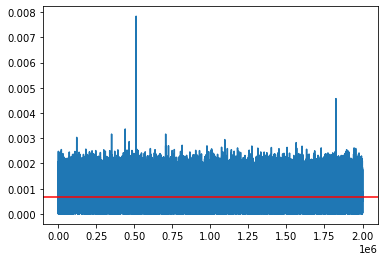

In [11]:
%matplotlib inline
# Flatten the traces
noise_traces_flattened = noise_traces_npy.flatten()
df_noise_flatten = pd.DataFrame(noise_traces_flattened)
plt.plot(noise_traces_flattened)
plt.axhline(noise_traces_flattened.mean(), color="r")
plt.show()

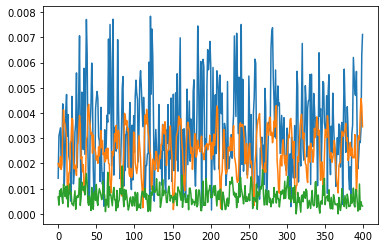

In [12]:
%matplotlib inline
index_1 = int(512400 / 400)
index_2 = int(1824800 / 400)
plt.plot(noise_traces_npy[index_1])
plt.plot(noise_traces_npy[index_2])
plt.plot(noise_traces_npy[index_2-20])
plt.show()

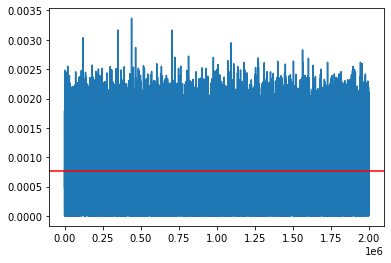

0.023575236328125002


In [14]:
%matplotlib inline
traces_fixed = noise_traces_npy.copy()
traces_fixed[index_1] = traces_fixed[index_1 -20]
traces_fixed[index_2] = traces_fixed[index_2 -20]
noise_traces_flattened_fixed = traces_fixed.flatten()
#noise_traces_flattened_fixed[index_1] = noise_traces_flattened_fixed[index_1-30]
plt.plot(noise_traces_flattened_fixed)
plt.axhline(root_mean_square(noise_traces_flattened_fixed), color="r")
plt.show()
print(root_mean_square(noise_traces_flattened_fixed*200)**2)

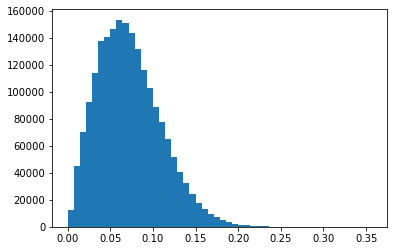

In [6]:
%matplotlib inline
plt.hist(noise_traces_flattened_fixed*106, bins=50)
plt.show()

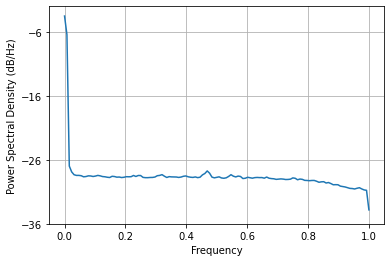

In [7]:
%matplotlib inline
plt.psd(noise_traces_flattened_fixed*106)
plt.show()

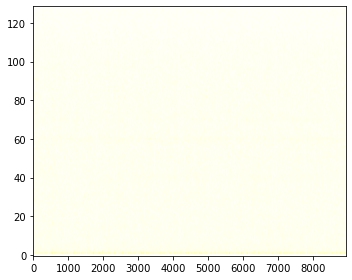

In [8]:
freqs, times, spectrogram = signal.spectrogram(noise_traces_flattened_fixed*106)

plt.figure(figsize=(5,4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.tight_layout()

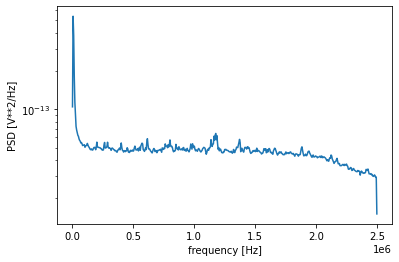

4.2267906e-14


In [17]:
fs = 5e6
f, Pxx_den = signal.welch(noise_traces_flattened_fixed, fs, nperseg=1024, average="mean")
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
print(np.mean(Pxx_den[256:512]))

In [10]:
from scipy.fftpack import fft, irfft, rfft, fftfreq
fft_noise_traces = rfft(noise_traces_flattened_fixed)
fft_noise_trces_x = fftfreq(len(noise_traces_flattened_fixed))
fft_noise_traces_rev = irfft(fft_noise_traces)


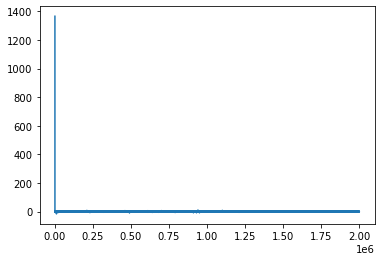

In [11]:
plt.plot(fft_noise_traces)
plt.show()

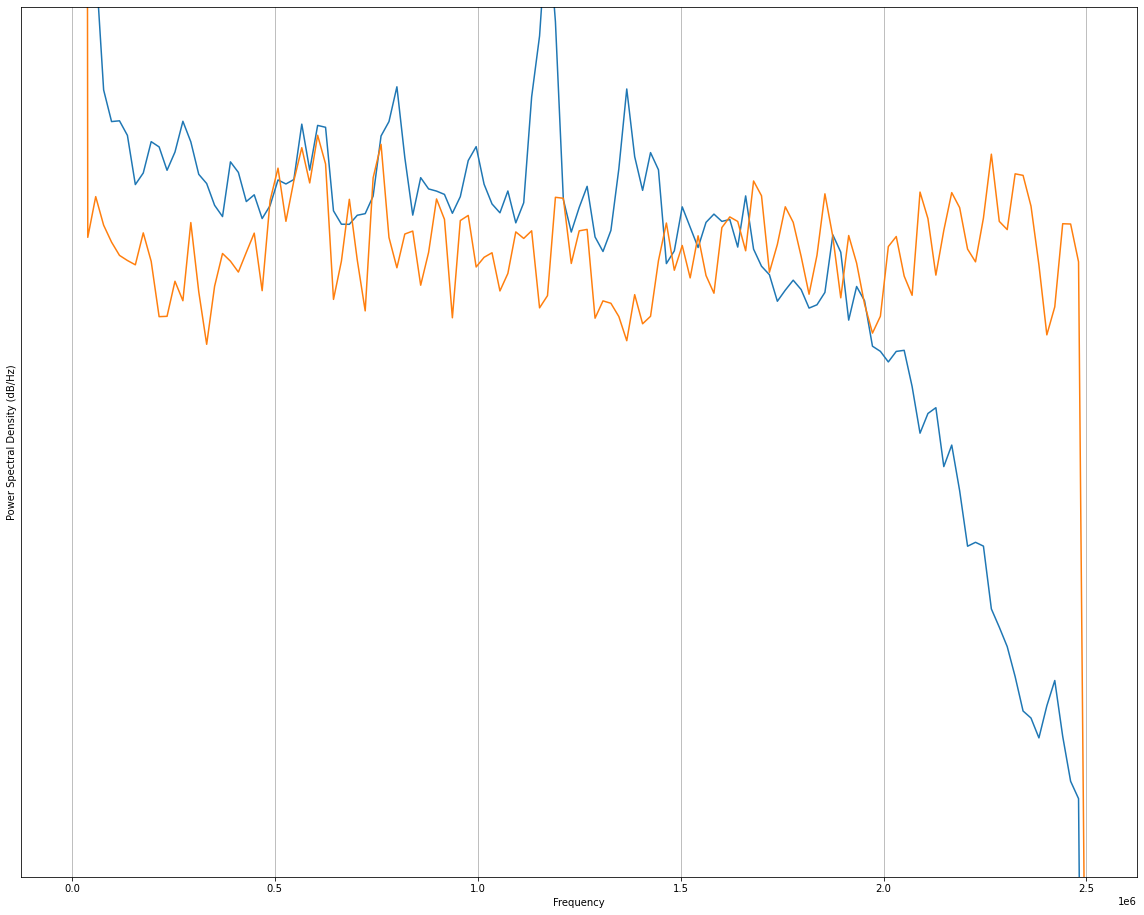

In [31]:
rayleigh_noise_set = []
for i in range(2000):
    rayleigh_noise = np.random.rayleigh(0.055,110)
    rayleigh_noise_set.append(rayleigh_noise)

rn = np.array(rayleigh_noise_set)
plt.figure(figsize=(20,16))
#plt.hist(noise_traces_flattened_fixed*105, bins=5000, density=True, histtype="stepfilled")
#plt.hist(rn.flatten(), bins=500, density=True, histtype="step", color="r", rwidth=4)
plt.psd(noise_traces_flattened_fixed*106, Fs=5e6)
plt.psd(rn.flatten(), Fs=5e6)
plt.ylim(-95, -92)
#plt.yticks()
plt.show()

In [38]:
MASTERTHESISTOP = os.getenv("MASTERTHESISTOP")
PATH = "datasets/last_round_aes/experiment_axel/1029_trace_noise_office/original_data/"
FILE = "all__1000.npy"
file_path = os.path.join(MASTERTHESISTOP, PATH, FILE)
original_noise_trace = np.load(file_path)
original_noise_trace.flatten().mean()

0.00068198366

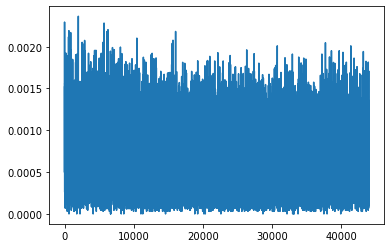

In [39]:
plt.plot(original_noise_trace.flatten())
plt.show()

# Find the scalar for 15m device 6

[[0.0055272  0.00849843 0.00669307 ... 0.00726036 0.00795805 0.00878273]
 [0.00642664 0.00784774 0.00607692 ... 0.00853321 0.00863174 0.00886295]
 [0.00543365 0.00842755 0.00606956 ... 0.00840188 0.0085574  0.00807821]
 ...
 [0.00614459 0.00800356 0.00659063 ... 0.00825561 0.00891889 0.00876904]
 [0.00641613 0.00748074 0.00601917 ... 0.01066665 0.00842579 0.00975157]
 [0.0049181  0.01126063 0.00832274 ... 0.01376897 0.0073956  0.0096672 ]]
Avg Scalar: 88.16201085315191, Avg Translation: -0.0033483202569186687
110


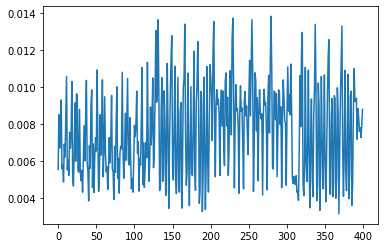

In [49]:
DEVICE = 10
PATH = f"datasets/last_round_aes/testing_data/testing_trace_15m/d{DEVICE}_5k/original_data/"
FILE = "all__100.npy"
traces = np.load(os.path.join(MASTERTHESISTOP, PATH, FILE))
print(traces)
averaging = 1

#trace_select = np.random.sample(len(trace))
#print(trace_select)
scalars = []
translations = []
for trace in traces:
    MAX = np.max(trace)
    MIN = np.min(trace)
    #nor_one_trace_maxmin = (one_trace-MIN)/(MAX-MIN)
    scalar = 1/(MAX-MIN)
    translation = -MIN
    scalars.append(scalar)
    translations.append(translation)

scalars = np.array(scalars)
translations = np.array(translations)
print(f"Avg Scalar: {scalars.mean()}, Avg Translation: {translations.mean()}")
#nor_trace_maxmin.append(nor_one_trace_maxmin)
print(translations.size)

plt.plot(traces[0])
plt.show()